In [28]:
!pip3 install h5py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 6.8 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.


In [55]:
import pandas
import matplotlib.pyplot as plt
import h5py
import os
import glob
import numpy as np

In [56]:


train_data_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img'
train_data = glob.glob(os.path.join(train_data_path, '*'))
mask_data_path = '/Users/tylerklimas/Desktop/landslide/TrainData/mask'
mask_data = glob.glob(os.path.join(mask_data_path, '*'))
train_data[1]

'/Users/tylerklimas/Desktop/landslide/TrainData/img/image_112.h5'

(128, 128, 14)


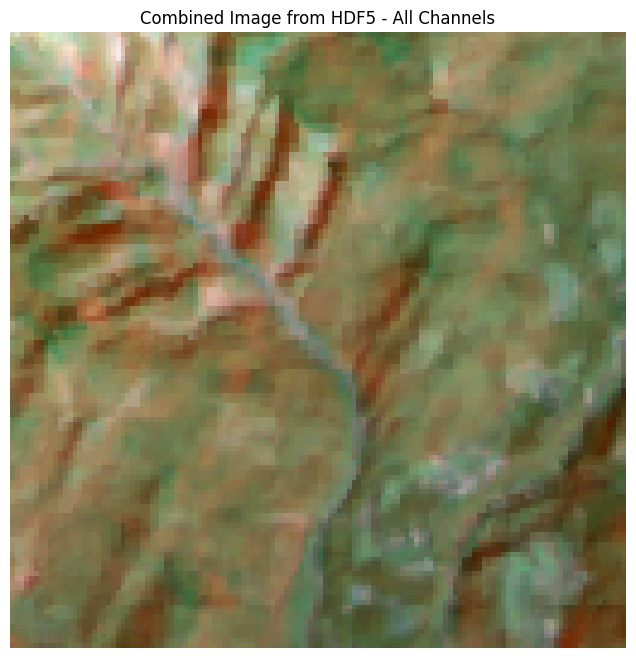

In [88]:
# Path to your HDF5 file
file_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img/image_2.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as f:
    # Assuming there's only one dataset containing image data
    # Access the dataset directly by name
    dataset_name = list(f.keys())[0]  # Assuming the first dataset is the image data
    dataset = f[dataset_name][:]
    
    # Combine all channels into a single image
    combined_image = np.zeros_like(dataset[:, :, 0:3], dtype=np.float32)  # Initialize with the first three channels
    for i in range(dataset.shape[2]):
        combined_image[:, :, i % 3] += dataset[:, :, i]  # Sum all channels modulo 3 (for RGB display)
    
    # Normalize the combined image to [0, 1]
    combined_image -= combined_image.min()
    combined_image /= combined_image.max()
    
    # Display the combined image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(combined_image)
    plt.axis('off')
    plt.title('Combined Image from HDF5 - All Channels')
    plt.show()

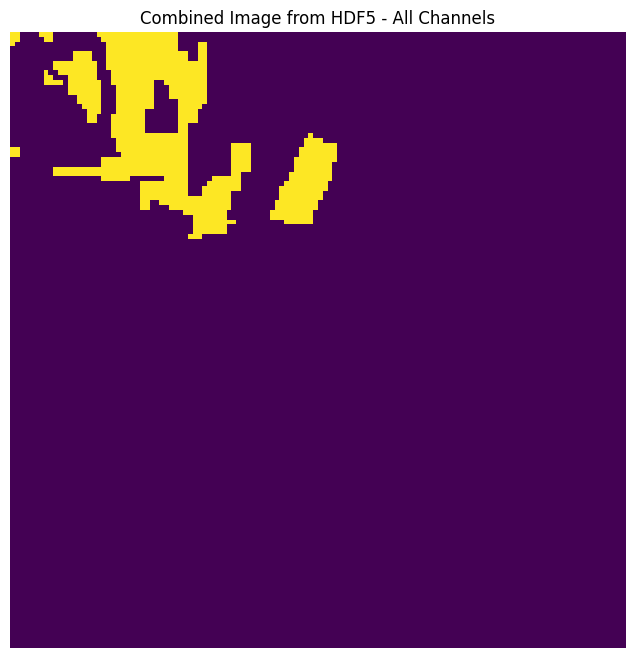

In [90]:
# Path to your HDF5 file
file_path = '/Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2.h5'

# Open the HDF5 file in read mode
with h5py.File(file_path, 'r') as f:
    # Assuming there's only one dataset containing image data
    # Access the dataset directly by name
    dataset_name = list(f.keys())[0]  # Assuming the first dataset is the image data
    dataset = f[dataset_name][:]

    # Display the combined image using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(dataset)
    plt.axis('off')
    plt.title('Combined Image from HDF5 - All Channels')
    plt.show()

In [91]:
train_path = '/Users/tylerklimas/Desktop/landslide/TrainData/img/*.h5'
mask_path = '/Users/tylerklimas/Desktop/landslide/TrainData/mask/*.h5'

train_XX = np.zeros((3799, 128, 128, 6))
train_YY = np.zeros((3799, 128, 128, 1))

all_train = sorted(glob.glob(train_path))
all_mask = sorted(glob.glob(mask_path))

In [93]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        data[np.isnan(data)] = 0.000001

        mid_rgb = data[:,:, 1:4].max() / 2.0
        mid_slope = data[:,:, 12].max() / 2.0
        mid_elevation = data[:,:, 13].max() / 2.0



        data_red = data[:,:, 3]
        data_nir = data[:,:, 7]
        data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))


        train_XX[i, :, :, 0] = 1 - data[:, :, 3] / mid_rgb #RED
        train_XX[i, :, :, 1] = 1 - data[:, :, 2] / mid_rgb #GREEN
        train_XX[i, :, :, 2] = 1 - data[:, :, 1] / mid_rgb #BLUE
        train_XX[i, :, :, 3] = data_ndvi                   #NDVI

        train_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope
        train_XX[i, :, :, 5] = 1 - data[:, :, 13] / mid_elevation


    
    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('mask'))
        train_YY[i, :, :, 0] = data
        

        
        

        

0 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1.h5
1 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_10.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_10.h5
2 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_100.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_100.h5
3 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1000.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1000.h5
4 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1001.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1001.h5
5 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1002.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1002.h5
6 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1003.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_1003.h5
7 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_1004.h5 /Users/tylerklimas/De

/var/folders/1f/_7z9t82101973t_1gxmf2vwc0000gn/T/ipykernel_59237/3076825626.py:25: RuntimeWarning: invalid value encountered in divide
  train_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope


1685 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2515.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2515.h5
1686 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2516.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2516.h5
1687 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2517.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2517.h5
1688 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2518.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2518.h5
1689 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2519.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2519.h5
1690 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_252.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_252.h5
1691 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_2520.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_2520.h5
1692 /Users/tylerklimas/Desktop/landslide/TrainData/img/i

/var/folders/1f/_7z9t82101973t_1gxmf2vwc0000gn/T/ipykernel_59237/3076825626.py:17: RuntimeWarning: invalid value encountered in divide
  data_ndvi = np.divide(data_nir - data_red, np.add(data_nir, data_red))


2277 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3048.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3048.h5
2278 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3049.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3049.h5
2279 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_305.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_305.h5
2280 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3050.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3050.h5
2281 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3051.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3051.h5
2282 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3052.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3052.h5
2283 /Users/tylerklimas/Desktop/landslide/TrainData/img/image_3053.h5 /Users/tylerklimas/Desktop/landslide/TrainData/mask/mask_3053.h5
2284 /Users/tylerklimas/Desktop/landslide/TrainData/img/i

In [96]:
# min max test to make sure data was loaded properly

train_XX[np.isnan(train_XX)] = 0.000001
min = np.min(train_XX)
max = np.max(train_XX)

miny = np.min(train_YY)
maxy = np.max(train_YY)
print(min, max, miny, maxy)


-1.0 1.0 0.0 1.0


In [ ]:
import torch
def dice_loss(y_true, y_pred):
    y_true = torch.from_numpy(y_true)
    y_pred = torch.sigmoid(y_pred)
    numerator = 2 * torch.sum(y_true * y_pred)
    denominator = torch.sum(y_true + y_pred)

    return 1 - numerator / denominator

